## SVM HW

In [18]:
import scipy.io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.svm, sklearn.utils, sklearn.cross_validation

numpy.set_printoptions(suppress=True)
%matplotlib inline

### Exercise 1, fitting an SVM/gaussian to data
#### load data, plot it

In [14]:
d = scipy.io.loadmat('ex6data2.mat')

In [19]:
d_df = pd.DataFrame({'X0':d['X'][:,0],
                     'X1':d['X'][:,1],
                     'y':np.ravel(d['y'])})

In [21]:
d_df['y'].unique()

array([1, 0], dtype=uint64)

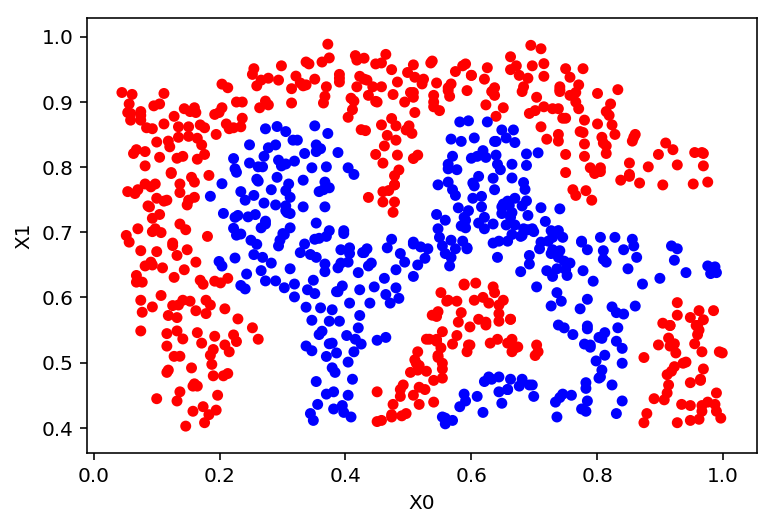

In [26]:
d_df.plot.scatter(x='X0', y='X1', c='y', colormap='bwr', colorbar=False)
plt.show()

#### Train a model to predict the data

In [35]:
X_train, X_test, y_train, y_test = sklearn.cross_validation.train_test_split(d_df.loc[:, 'X0':'X1'].values,
                                                                             d_df['y'].values,
                                                                             test_size=0.3,
                                                                             random_state=1,
                                                                             stratify=d_df['y'].values)

In [27]:
svm_svr = sklearn.svm.SVR()

In [36]:
svm_svr.fit(X_train, y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [37]:
y_pred = svm_svr.predict(X_test)

#### Plot the decision boundary

In [38]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, classifier, test_idx=None, resolution=0.02):

    # setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c='',
                    edgecolor='black',
                    alpha=1.0,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

In [39]:
X_combined = np.vstack((X_train, X_test))
y_combined = np.hstack((y_train, y_test))

plot_decision_regions(X=X_combined, y=y_combined, classifier=svm_svr)

plt.tight_layout()
plt.show()

/Users/user1/anaconda2/lib/python2.7/site-packages/matplotlib/contour.py:1180: UserWarning: No contour levels were found within the data range.
  warnings.warn("No contour levels were found"


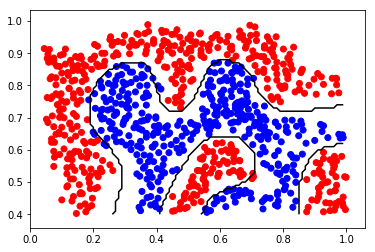

### Exercise 2: picking C and sigma to best match the data

#### Load the data and plot it

In [40]:
d = scipy.io.loadmat('ex6data3.mat')

In [42]:
d.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X', 'y', 'yval', 'Xval'])

In [63]:
np.unique(d['y'])

array([0, 1], dtype=uint8)

In [48]:
X_combined = np.vstack((d['X'], d['Xval']))
y_combined = np.hstack((np.ravel(d['y']), np.ravel(d['yval'])))

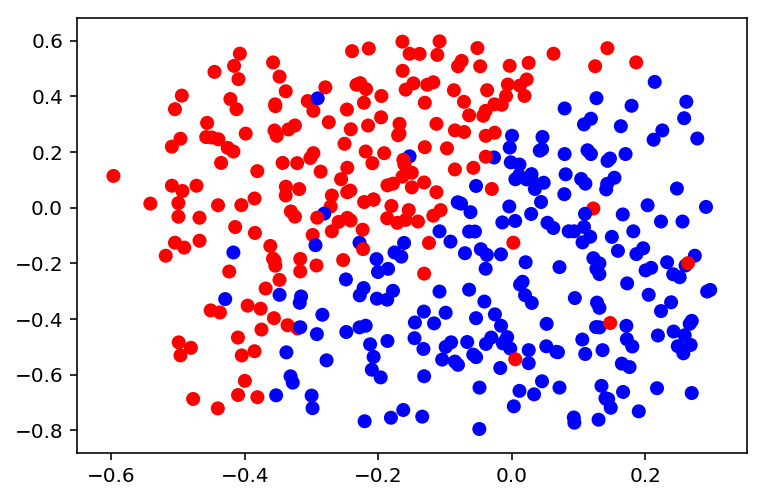

In [51]:
plt.scatter(X_combined[:,0], X_combined[:,1], c=y_combined, cmap='bwr')
plt.show()

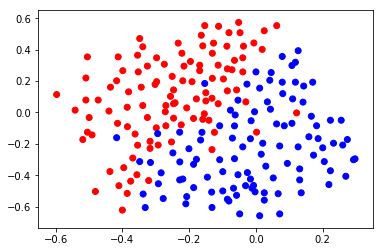

#### Pick the best C and sigma using the homework method of evaluating vs Xval/yval

In [54]:
svm_svr = sklearn.svm.SVR()

svm_svr.fit(d['X'], np.ravel(d['y']))

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [55]:
svm_svr.score(d['Xval'], np.ravel(d['yval']))

0.5632917682910699

In [56]:
svm_svr = sklearn.svm.SVR(C=10)

svm_svr.fit(d['X'], np.ravel(d['y']))

SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [57]:
svm_svr.score(d['Xval'], np.ravel(d['yval']))

0.6382161134295574

In [58]:
svm_svr = sklearn.svm.SVR(C=50)

svm_svr.fit(d['X'], np.ravel(d['y']))

SVR(C=50, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [59]:
svm_svr.score(d['Xval'], np.ravel(d['yval']))

0.6757180380605272

#### Plot the decision boundary for the best choice

In [60]:
plot_decision_regions(X=d['Xval'], y=np.ravel(d['yval']), classifier=svm_svr)

plt.tight_layout()
plt.show()

#### Pick the best C and sigma using sklearn's cross validation library


In [69]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import precision_score, recall_score

scoring =['precision', 'recall']
scores = cross_validate(svm_svr, d['Xval'], np.ravel(d['yval']),
                        cv=10, return_train_score=False)


In [70]:
scores

{'fit_time': array([0.00389886, 0.00308704, 0.00312901, 0.00374389, 0.00303793,
        0.00350499, 0.00331497, 0.00378227, 0.00387406, 0.00317121]),
 'score_time': array([0.00037599, 0.00026011, 0.00046492, 0.00034308, 0.00037026,
        0.00030994, 0.00039983, 0.00032377, 0.00037694, 0.00032997]),
 'test_score': array([0.71394833, 0.78791269, 0.32412845, 0.61601146, 0.5768987 ,
        0.68718646, 0.7950515 , 0.81289696, 0.59097018, 0.6184118 ])}

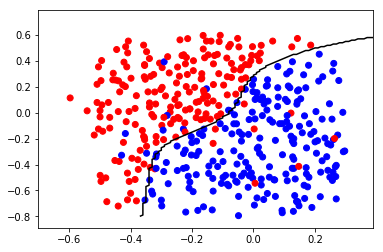